# Exploratory Data Analysis (EDA)

## What happened so far?
Previously, I ideated the project, set up milestones, a project and directory structure, and downloaded this dataset from Kaggle:

_Title_: Heart Failure Prediction

_Citation_: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

_Link_: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

It is well documented, available for public use, and well suited for a data science project including EDA, some nice visualisations and predictive modeling. In addition to that, it fits my background in biomedical research, and might help raising awareness to this topic, since cardiovascular diseases are the currently the most common cause of death world wide.

## What's next?
In this notebook, I will take perform an EDA to take an even closer look at the dataset. Among other things, I will inspect its features, look for some potential correlations or other underlying properties and create some (hopefully) beautiful visualistions.

In [13]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

I added a `config.py` file including paths for files to be able to access specific data sets using variables instead of fully written paths. It is saved in `src/utils/`.
I can only access it using `from src.utils.config import ...` when current working directory (cwd) is tha project's base directory `heart_failure_predictions`. When starting this notebook, cwd is the subdirectory for `heart_failure_predictions/notebooks`.

__FIXME__: If you know how I can use `src` from within the `notebooks` directory, feel free to reach out to me, open an issue including the fix or create a pull request.

In [2]:
# set working directory to project's base directory to be able to access src
os.chdir("..")
# import paths leading to raw data from the config.py file
from src.utils.config import raw_data

In [4]:
# load the raw data into a data frame called patients
patients = pd.read_csv(raw_data)
patients

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Goals

### Getting an Overview
This is done to get an overview of all that's available in the dataset. Without properly understanding your source data, it's impossible to make use of it. This included inspecting data types, distributions and making visualisations.

### Data Cleaning
This dataset was acquired from Kaggle. It is already structured and cleaned. It is rather unlikely that there are even missing values in it. Still, it needs to be checked, since the algorithms I aim to make use of, cannot handle missing values, and in case there are some, they need to be handled.

### Feature Selection
FIXME: This is often seen as a part of feature engineering (together with feature extraction). Still need to decide if I include it here or in another notebook. Also, data cleaning and handling missing values can be seen as feature engineering. Think about if this notebook should be renamed to "EDA and Feature Engineering" or something similar to that, and if I should include the remaining parts of feature engineering here or not. Before, I had planned to perform feature extraction in a separate notebook, and I actually still think that this is a good idea.‚

One main challenges to overcome in machine learning projects is to select relevant features for training the algorithms. Your model can always only be as good as the underlying data used to train it. You cannot out-train bad data. It is your job to select relevant features and to sort out irrelevant ones in order to ensure usefulness of your model.

### Questions to answer
- With the given dataset and dependent variable, what kind of task will the model have to perform?
- Are there missing values? If yes, what to do with them?


## Data Dictionary and further Variable Information
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- sex: woman or man (binary, Male = 1, Female = 0)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)

For all boolean variables: 0 = False (or rather No), 1 = True (or rather Yes)

There are no missing values in the data set.

A lot of the questions can be answered by having a look at the data dictionary.

### Task
There is a dependent variable / label (DEATH_EVENT) -> it is a supervised learning problem. \
The label is binary (boolean): 0 (patient survived the follow-up period) and 1 (patient did not survive the follow-up period) -> it is a classification problem.

### Handling Missing Values
Since there are no missing values, no handling of them is necessary. This is a typical situation for data acquired from Kaggle. Please note, however, that this is rather unlikely if you work with real world data.

# Getting an Overview of the Data

In [8]:
# use the data frame's method info to get an overview and confirm the info from above
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The data frame has only 299 entries. This is very little for a typical machine learning problem. Using rather complex models might not be advised here, since the chance of overfitting is high.

It confirms that there are no missing values anywhere in the data set. Also, nothing suspicious is apparent.

All values are numerical. From the data dictionary it is known that all values are either boolean (stored as int64 here) or some value like number of days or percentages.

In [10]:
# get mroe detailed info on all the numerical values using the describe method
patients.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Boolean Values
For boolean values, the mean gives us the ratio of positives.
The groups are not equally distributed, but this is most likely not going to be an issue here.

### Other Values
For remaining values, we get a good idea of the distribution. I note down some things immediately visible to the eye. I will have a closer look later on.
- age: Distribution looks normal
- creatinine_phosphokinase: The distribution has a high degree of dispersion and exhibits significant variability. This should be further inspected. Later on in the project, it might be a good idea to apply some scaling to this.
- ejection_fraction: Distribution is slightly skewed
- platelets and serum_creatinine: Looks like there is at least one outlier
- serum_sodium: Distribution looks normal
- time: Not all individuals have been screened for the same amount of time. Most did not decease during the follow-up period. I suspect that there is a correlation between this column and the DEATH_EVENT. This needs to be inspected, and concluded if it leads to issues.

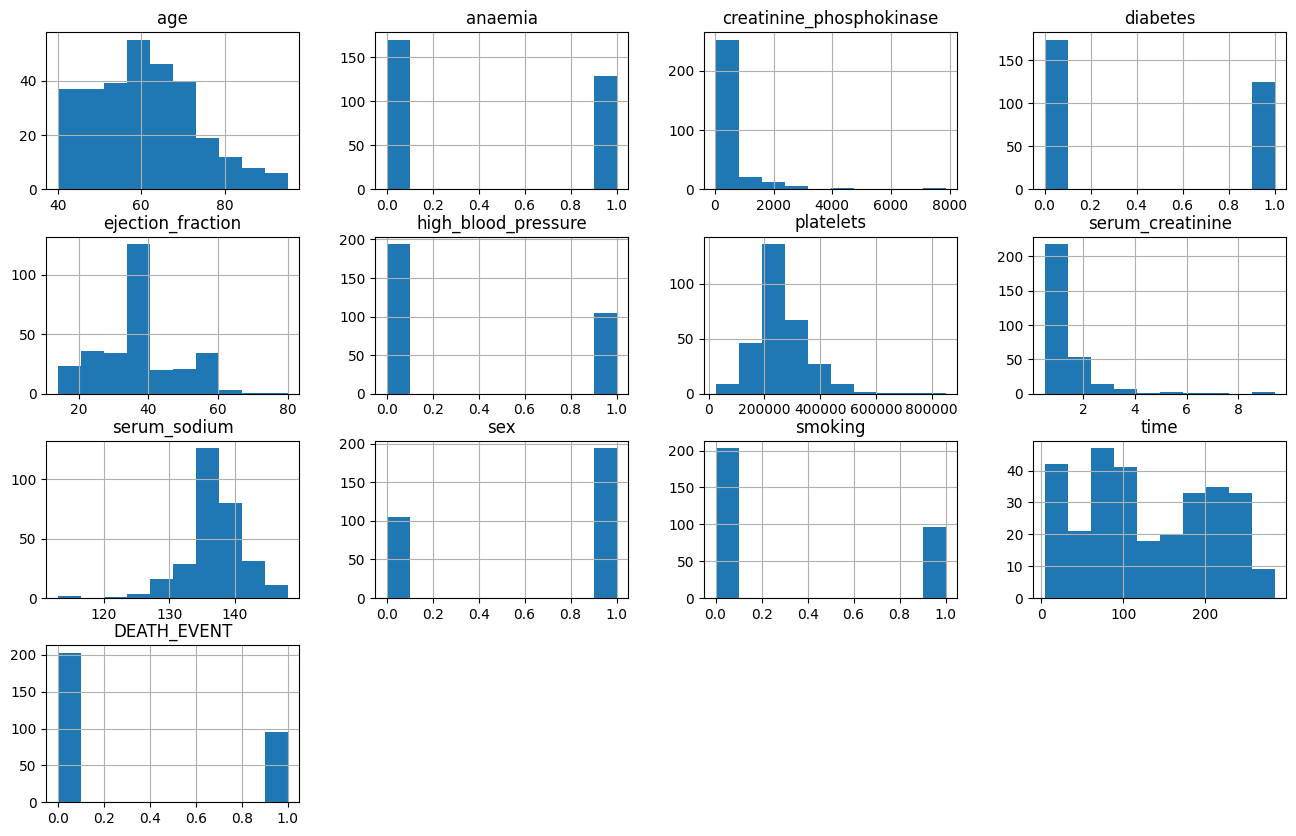

In [20]:
# visualize the values in form of a histogram
# FIXME: Think about if it makes any sense to also visualize the boolean values here
# figsize: set size and make sure it prints in sufficient size so its readable
patients.hist(figsize=(16, 10))
plt.show()

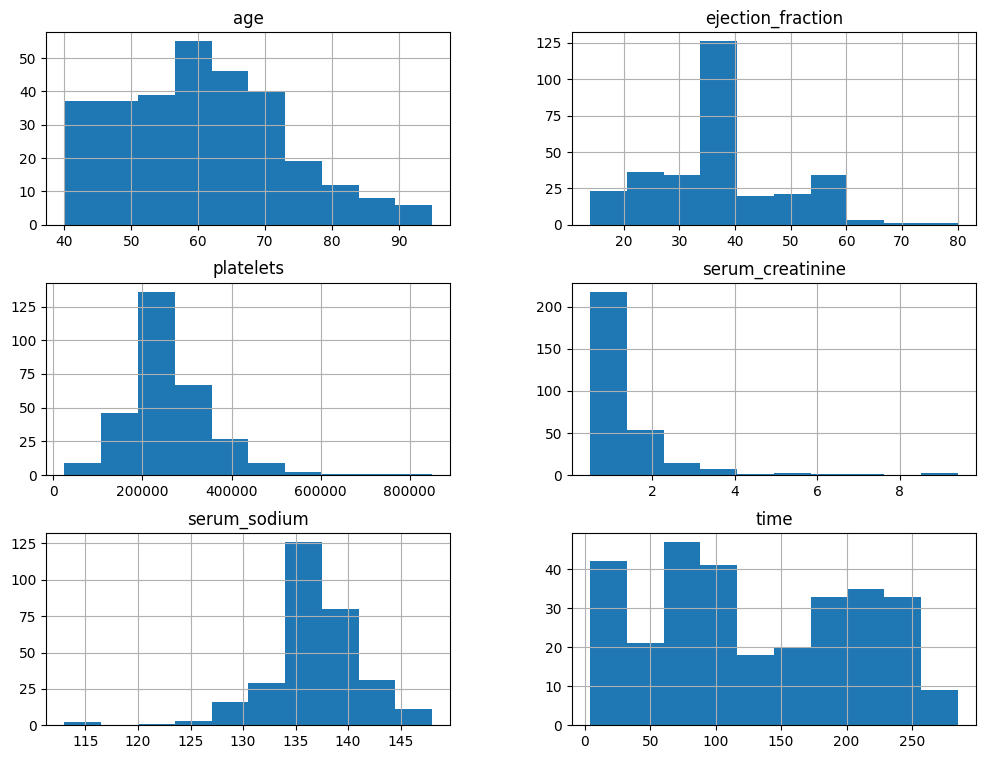

In [31]:
# here, only plot the non boolean / numeric ones and increase number of bins
numeric_cols = patients[["age", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]
numeric_cols.hist(figsize=(12, 9)) # FIXME: adjust binsize (maybe individually for the plots if posssible) like this: bins = 15; auto set is mediocre
plt.show()

In [ ]:
# here, maybe plot only the boolean ones and have only two columns, dont use a histogram
# probably its not even necessary to print them at all, because the ratio was visible above